# 1. Creating Model

In [ ]:
from keras import layers
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32,(3,3),activation="relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))



In [ ]:
model.summary()

# 2. Compiling Model

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer= optimizers.RMSprop(learning_rate = 1e-4),
             metrics=["acc"])

# 3. Data Generation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./255)
validation_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_directory = "datasets/catdog/train"
validation_directory = "datasets/catdog/validation"

In [ ]:
train_generator = train_datagen.flow_from_directory(train_directory,target_size=(150,150),batch_size=20,class_mode="binary")
validation_generator = validation_datagen.flow_from_directory(validation_directory,target_size=(150,150),batch_size=20,class_mode="binary")


# 4. Training

In [ ]:
history = model.fit(train_generator,epochs=20, validation_data= validation_generator, validation_steps=50)


# 5. Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-darkgrid")
plt.figure()

epochs = np.arange(0,20)

plt.plot(epochs, history.history["loss"], label = "train_loss")
plt.plot(epochs, history.history["val_loss"], label = "val_loss")

plt.plot(epochs, history.history["acc"], label = "train_acc")
plt.plot(epochs, history.history["val_acc"], label = "val_acc")

plt.title("Training | loss & acc")
plt.xlabel("20 - Epoch")
plt.ylabel("loss - acc")
plt.legend(loc="lower left")
# Degerler birbirine yakınsamıyor OVERFITTING problemi var. 

Problem: Overfitting
    
    1. New Model
    2. Data Augmentation

In [ ]:
# Saving First Model
model.save("models/cat_dog_first.h5")

# 6. Creating New Model

In [ ]:
model_n = Sequential()

model_n.add(layers.Conv2D(32,(3,3),activation="relu", input_shape = (150,150,3)))
model_n.add(layers.MaxPooling2D((2,2)))

model_n.add(layers.Conv2D(64,(3,3),activation="relu"))
model_n.add(layers.MaxPooling2D((2,2)))

model_n.add(layers.Conv2D(128,(3,3),activation="relu"))
model_n.add(layers.MaxPooling2D((2,2)))

model_n.add(layers.Conv2D(128,(3,3),activation="relu"))
model_n.add(layers.MaxPooling2D((2,2)))

model_n.add(layers.Flatten())
model_n.add(layers.Dropout(0.4))

model_n.add(layers.Dense(512, activation="relu"))
model_n.add(layers.Dense(1, activation="sigmoid"))

model_n.summary()

# 7. Compiling New Model

In [ ]:
model_n.compile(loss="binary_crossentropy",
                optimizer= optimizers.RMSprop(learning_rate = 1e-4),
                metrics=["acc"])

# 8. Image Data Augmentation

In [ ]:
train_datagen_n = ImageDataGenerator(rescale=1./255,
                                      rotation_range=45,
                                      width_shift_range=0.3,
                                      height_shift_range=0.3,
                                      shear_range=0.3,
                                      zoom_range=0.3,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode="nearest")
validation_datagen_n = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator_n =  train_datagen_n.flow_from_directory(train_directory,
                                                         target_size=(150,150),
                                                         batch_size=16,
                                                         class_mode="binary")
validation_generator_n = validation_datagenr_n.flow_from_directory(validation_directory,
                                                                   target_size=(150,150),
                                                                   batch_size=16,
                                                                   class_mode="binary")

# 9. Fitting New Model

In [ ]:
history_n = model_n.fit(train_generator_n,
                        steps_per_epoch=100,
                        epochs=100, 
                        validation_data= validation_generator_n, 
                        validation_steps=50)
print("info : Done!")

# 10. Visualization New Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-darkgrid")
plt.figure()

epochs_n = np.arange(0,100)

plt.plot(epochs_n, history_n.history["loss"], label = "train_loss")
plt.plot(epochs_n, history_n.history["val_loss"], label = "val_loss")

plt.plot(epochs_n, history_n.history["acc"], label = "train_acc")
plt.plot(epochs_n, history_n.history["val_acc"], label = "val_acc")

plt.title("Training | loss & acc")
plt.xlabel("100 - Epoch")
plt.ylabel("loss - acc")
plt.legend(loc="lower left")

plt.savefig("cat_dog_training_graph.jpg")

In [ ]:
model_n.save("models/cat_dog_last.h5")

# PREDICTION

In [9]:
# library
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

In [10]:
model_path = "models/cat_dog_last.h5"
image_path = "datasets/catdog/test/cats/1503.jpg"

In [11]:
prediction_model = load_model(model_path)
test_img = load_img(image_path, target_size=(150,150)) # bizim modelimiz 150 150 de calıstıgı icin 

<PIL.Image.Image image mode=RGB size=150x150 at 0x1AB780FBB20>


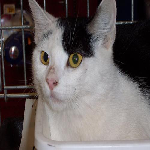

In [12]:
print(test_img)
test_img

In [13]:
test_img = img_to_array(test_img)
test_img.shape

(150, 150, 3)

In [14]:
# 3D -> 4D
test_img = np.expand_dims(test_img, axis=0)
test_img.shape
# key-value cats:0 ; dogs : 1

(1, 150, 150, 3)

In [15]:
result = prediction_model.predict(test_img)
result

array([[0.]], dtype=float32)

In [16]:
if result[0][0] >= 0.7:
    label = "Dog"
    print("This is a ",label)
else:
    label = "Cat"
    print("This is a ",label)

This is a  Cat


In [17]:
import cv2

font = cv2.FONT_HERSHEY_COMPLEX
color = (0,0,255)
test_img = cv2.imread(image_path)

cv2.putText(test_img,label,(20,40),font,1,color, 3)

cv2.imshow("prediction",test_img)

cv2.waitKey(0)
cv2.destroyAllWindows()